# Train SLM with quantized levels

#### Study of single qdit inference gate
By Claudio
Initial version 31 Agoust 2019, single input training with clipping of real and imaginary part

Figure 3 of [arXiv:1905.05264](https://arxiv.org/abs/1905.05264)

Version 4 april 2020

Need tensorflow 1.15 
`pip install tensorflow==1.15`

In [1]:
import sys
import tensorflow as tf
import numpy as np
import time
import matplotlib.pyplot as plt
from utilitiesquantumgates import SLM
from utilitiesquantumgates import quantumgates 
from utilitiesquantumgates import quantumgatesinference 
from utilitiesquantumgates import utilities
from tensorboardutilities import tensorboardutilities
from datetime import datetime
# datatypes
npdatatype=np.complex64
tfdatatype=tf.complex64
tfrealdatatype=tf.float32 # to use double switch aboe to complex128


Dimensions

In [2]:
N=3 # reduced dimensions
M=10 # embedding dimension

Target gate

In [3]:
X_np=quantumgates.Xgate(N,npdatatype)
utilities.printonscreennp(X_np)    

+0.0+0.0i +1.0+0.0i +0.0+0.0i 
+0.0+0.0i +0.0+0.0i +1.0+0.0i 
+1.0+0.0i +0.0+0.0i +0.0+0.0i 


Generate the random unitary matrix

In [4]:
U_np=quantumgates.randomU(M,npdatatype)  
utilities.printonscreennp(U_np)    

-0.1-0.1i -0.2-0.1i -0.4-0.2i -0.1+0.1i -0.2+0.4i +0.4-0.4i +0.1-0.1i -0.1+0.3i -0.1+0.2i +0.1+0.1i 
-0.2-0.1i -0.1-0.3i +0.1-0.2i +0.2+0.0i +0.3-0.1i -0.1+0.4i +0.1-0.2i -0.1+0.4i +0.2+0.3i -0.0-0.3i 
-0.3-0.0i +0.4+0.0i -0.2-0.1i -0.0+0.3i -0.1+0.3i +0.0+0.3i -0.2-0.2i +0.4-0.3i -0.0+0.3i -0.1+0.2i 
-0.3-0.1i -0.3-0.3i +0.3-0.2i -0.1-0.1i +0.3+0.1i +0.1-0.2i +0.3-0.2i +0.3-0.3i -0.2-0.1i -0.0+0.2i 
-0.3-0.2i +0.1+0.0i -0.1-0.2i +0.3+0.3i -0.3-0.3i -0.1-0.2i +0.2+0.1i +0.0-0.2i +0.2-0.3i +0.2-0.3i 
-0.2-0.3i -0.1+0.5i +0.1+0.1i -0.0-0.2i +0.2+0.3i +0.2+0.3i +0.1-0.2i -0.2-0.0i +0.1-0.2i +0.4-0.0i 
-0.3-0.3i +0.0+0.2i +0.3-0.1i +0.4-0.4i -0.2-0.0i +0.0-0.2i -0.4+0.2i -0.1+0.0i -0.0+0.3i -0.1+0.2i 
-0.2-0.3i -0.1-0.1i -0.2+0.4i -0.4-0.2i -0.1-0.2i +0.1+0.0i +0.1+0.1i -0.2-0.2i +0.1+0.3i -0.3-0.3i 
-0.2-0.3i +0.2-0.2i -0.3+0.1i -0.1-0.0i +0.2-0.3i -0.2+0.0i -0.1-0.1i -0.2+0.2i -0.1-0.4i +0.0+0.5i 
-0.2-0.1i -0.3+0.1i -0.1-0.2i -0.1+0.3i +0.2+0.2i -0.1+0.1i -0.3+0.5i -0.1-0.0i -0.2-0.3i -

## Train amplitude only with -1.0 and 1.0 and zero image

In [5]:
out=\
    SLM.complexqtzd(
            X_np,U_np,
            verbose=2,
            epochs=1000,
            display_steps=50,
            realMAX=1.0,
            realMIN=-1.0,
            imagMAX=0.0,
            imagMIN=0.0,
            nbits=1
            )  

Random seed = 1586015251


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Running with M 10 N 3 ntrain 1 nvalid 1
epoch 0
cost 2.7460594177246094
valid cost 2.7460594177246094
epoch 50
cost 0.43214064836502075
valid cost 0.43214064836502075
epoch 100
cost 0.26441946625709534
valid cost 0.26441946625709534
epoch 150
cost 0.34430378675460815
valid cost 0.34430378675460815
epoch 200
cost 0.26441946625709534
valid cost 0.26441946625709534
epoch 250
cost 0.35293567180633545
valid cost 0.35293567180633545
epoch 300
cost 0.26441946625709534
valid cost 0.26441946625709534
epoch 350
cost 0.35938385128974915
valid cost 0.35938385128974915
epoch 400
cost 0.2792971432209015
valid cost 0.2792971432209015
epoch 450
cost 0.4121170938014984
valid cost 0.4121170938014984
epoch 500
cost 0.4253048896789551
valid cost 0.4253048896789551
epoch 550
cost 0.30000001192092896
valid cost 0.30000001192092896
epoch 600
cost 0.3236009180545807
valid cost 0.32360091805

## Scaling with M at 1 bit

In [6]:
Mmin=5
Mmax=100
step=5
Ms=list()
Nepoch=list()
Cost1=list()
count=0
for im in range(Mmin,Mmax+1,step):
    Ms.append(im)
    U_np=quantumgates.randomU(im,npdatatype)  
    out=\
    SLM.complexqtzd(
            X_np,U_np,
            verbose=1,
            epochs=1000,
            display_steps=50,
            realMAX=1.0,
            realMIN=-1.0,
            imagMAX=0.0,
            imagMIN=0.0,
            nbits=1
            )                                                                 
    Nepoch.append(out['epoch'])
    Cost1.append(out['cost'])
    count=count+1
    print('Running with M ' + 
          repr(im)+' cost  '+repr(out['cost']))

Running with M 5 N 3 ntrain 1 nvalid 1
No convergence, maximal epochs reached 1000
Running with M 5 cost  0.5798710584640503
Running with M 10 N 3 ntrain 1 nvalid 1
No convergence, maximal epochs reached 1000
Running with M 10 cost  0.28396692872047424
Running with M 15 N 3 ntrain 1 nvalid 1
No convergence, maximal epochs reached 1000
Running with M 15 cost  0.37478217482566833
Running with M 20 N 3 ntrain 1 nvalid 1
No convergence, maximal epochs reached 1000
Running with M 20 cost  0.34106820821762085
Running with M 25 N 3 ntrain 1 nvalid 1
No convergence, maximal epochs reached 1000
Running with M 25 cost  0.20307935774326324
Running with M 30 N 3 ntrain 1 nvalid 1
No convergence, maximal epochs reached 1000
Running with M 30 cost  0.17323991656303406
Running with M 35 N 3 ntrain 1 nvalid 1
No convergence, maximal epochs reached 1000
Running with M 35 cost  0.15003417432308197
Running with M 40 N 3 ntrain 1 nvalid 1
No convergence, maximal epochs reached 1000
Running with M 40 cost 

## Scaling with M at 8 bit

In [7]:
Ms=list()
Nepoch=list()
Cost8=list()
count=0
for im in range(Mmin,Mmax+1,step):
    Ms.append(im)
    U_np=quantumgates.randomU(im,npdatatype)  
    out=\
    SLM.complexqtzd(
            X_np,U_np,
            verbose=1,
            epochs=1000,
            display_steps=50,
            realMAX=1.0,
            realMIN=-1.0,
            imagMAX=0.0,
            imagMIN=0.0,
            nbits=8
            )                                                                 
    Nepoch.append(out['epoch'])
    Cost8.append(out['cost'])
    count=count+1
    print('Running with M ' + 
          repr(im)+' cost  '+repr(out['cost']))

Running with M 5 N 3 ntrain 1 nvalid 1
No convergence, maximal epochs reached 1000
Running with M 5 cost  0.27493923902511597
Running with M 10 N 3 ntrain 1 nvalid 1
No convergence, maximal epochs reached 1000
Running with M 10 cost  0.12325720489025116
Running with M 15 N 3 ntrain 1 nvalid 1
No convergence, maximal epochs reached 1000
Running with M 15 cost  0.09050745517015457
Running with M 20 N 3 ntrain 1 nvalid 1
No convergence, maximal epochs reached 1000
Running with M 20 cost  0.07686649262905121
Running with M 25 N 3 ntrain 1 nvalid 1
No convergence, maximal epochs reached 1000
Running with M 25 cost  0.0733209028840065
Running with M 30 N 3 ntrain 1 nvalid 1
No convergence, maximal epochs reached 1000
Running with M 30 cost  0.0524880550801754
Running with M 35 N 3 ntrain 1 nvalid 1
No convergence, maximal epochs reached 1000
Running with M 35 cost  0.03707529231905937
Running with M 40 N 3 ntrain 1 nvalid 1
No convergence, maximal epochs reached 1000
Running with M 40 cost  

## Scaling with M without quantization

In [8]:
Ms=list()
Nepoch=list()
Cost=list()
count=0
for im in range(Mmin,Mmax+1,step):
    Ms.append(im)
    U_np=quantumgates.randomU(im,npdatatype)  
    out=\
    SLM.complex(
            X_np,U_np,
            verbose=1,
            epochs=1000,
            display_steps=50,
            realMAX=1.0,
            realMIN=-1.0,
            imagMAX=0.0,
            imagMIN=0.0
            )                                                                 
    Nepoch.append(out['epoch'])
    Cost.append(out['cost'])
    count=count+1
    print('Running with M ' + 
          repr(im)+' cost  '+repr(out['cost']))




Running with M 5 N 3 ntrain 1 nvalid 1




No convergence, maximal epochs reached 1000
Running with M 5 cost  0.3291328549385071
Running with M 10 N 3 ntrain 1 nvalid 1
No convergence, maximal epochs reached 1000
Running with M 10 cost  0.12193205207586288
Running with M 15 N 3 ntrain 1 nvalid 1
No convergence, maximal epochs reached 1000
Running with M 15 cost  0.08755034953355789
Running with M 20 N 3 ntrain 1 nvalid 1
No convergence, maximal epochs reached 1000
Running with M 20 cost  0.055066920816898346
Running with M 25 N 3 ntrain 1 nvalid 1
No convergence, maximal epochs reached 1000
Running with M 25 cost  0.060176800936460495
Running with M 30 N 3 ntrain 1 nvalid 1
No convergence, maximal epochs reached 1000
Running with M 30 cost  0.058614518493413925
Running with M 35 N 3 ntrain 1 nvalid 1
No convergence, maximal epochs reached 1000
Running with M 35 cost  0.04628570005297661
Running with M 40 N 3 ntrain 1 nvalid 1
No convergence, maximal epochs reached 1000
Running with 

## Plotting

In [9]:
%matplotlib inline

Text(0, 0.5, 'Cost function')

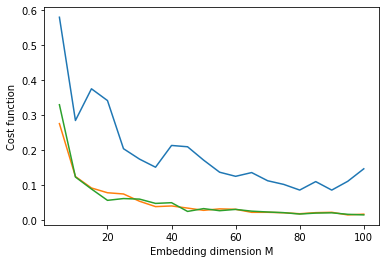

In [15]:
plt.figure(1)
#plt.subplot(311)
plt.plot(Ms,Cost1)
plt.plot(Ms,Cost8)
plt.plot(Ms,Cost)
plt.xlabel('Embedding dimension M')
plt.ylabel('Cost function')

Save figure as eps

In [16]:
plt.savefig('figurescaling2.eps', dpi=600, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format='eps',
        transparent=False, bbox_inches=None, pad_inches=0.1,
        metadata=None)

<Figure size 432x288 with 0 Axes>

In [17]:
print(Nepoch)

[999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999, 999]


In [18]:
print(Ms)

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]


In [14]:
#print(out)